 # Notebook 05 — Visualization



 Isolated from computation so that figures can be iterated quickly without

 re-running the full pipeline.



 Workflow:

 1. Full pipeline re-run (auth → align → calibrate)

 2. Four-panel composite figure (`plot_results`)

 3. Per-branch validation subplots

 4. Element correlation heatmap (LaTeX isotope labels)

 5. Optional: save figures to Drive

 ## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!pip install dtaidistance

import sys

# Edit REPO_PATH if you cloned the repo to a different location inside MyDrive
REPO_PATH = '/content/rhodopipeline'
if REPO_PATH not in sys.path:
    sys.path.insert(0, REPO_PATH)

import rhodopipeline
from rhodopipeline import RhodolithPipeline, CONFIG

pipeline = RhodolithPipeline(CONFIG)
pipeline.authenticate()
pipeline.load_temperature_data()
pipeline.load_curve6_curve7()
pipeline.screen_best_linear_branch()
pipeline.generate_synthetic_master()
pipeline.perform_dtw_alignment(window_days=30)
pipeline.build_composite_and_calibrate()

print('\nPipeline ready for plotting.')


Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 58.2 MB/s eta 0:00:00
STEP 1: AUTHENTICATION
Mounted at /content/drive
✓ Authenticated.

STEP 2: LOAD TEMPERATURE
✓ Temp loaded: 130 days.
  Range: 26.07–32.72 °C

LOAD CURVE6 & CURVE7 (Rhodo25_data)
✓ Curve6 loaded (78 increments)
✓ Curve7 loaded (81 increments)

STEP 3: SCREENING (Linear + Curve6/7 for AFE5-1)
  afe5-1: Linear R² = 0.4106
      curve6 time R² = 0.4899
      curve7 time R² = 0.4771
  afe5-2: Linear R² = 0.5011
  afe5-3: Linear R² = 0.4610
  afe5-4: Linear R² = 0.6092
  afe5-5: Linear R² = 0.0707
  afe5-6: Linear R² = 0.0764
  afe5-7: Linear R² = 0.3628

✓ WINNER: afe5-4 using linear time axis
  Mg/Sr = 2.0577 * Temp + 13.4355
  Best R² = 0.6092

STEP 4: GENERATE SYNTHETIC Mg/Sr MASTER
✓ Synthetic Master Created (130 days)
  Mg/Sr range: 67.08–80.75 mmol/mol

STEP 5: UNIFIED DTW ALIGNMENT (window=30 days)
  ✓ Aligned afe5-1: 156 steps, stretch=1.20
  ✓ Aligned afe5-2: 147 steps, stretch=1.

 ## Four-panel composite figure



 Panels A–C show each aligned proxy series (Mg/Sr, Mg/Ca, Sr/Ca) with the

 logger temperature on the right axis. Panel D overlays all three

 reconstructions against the logger record.

STEP 7: PLOTTING


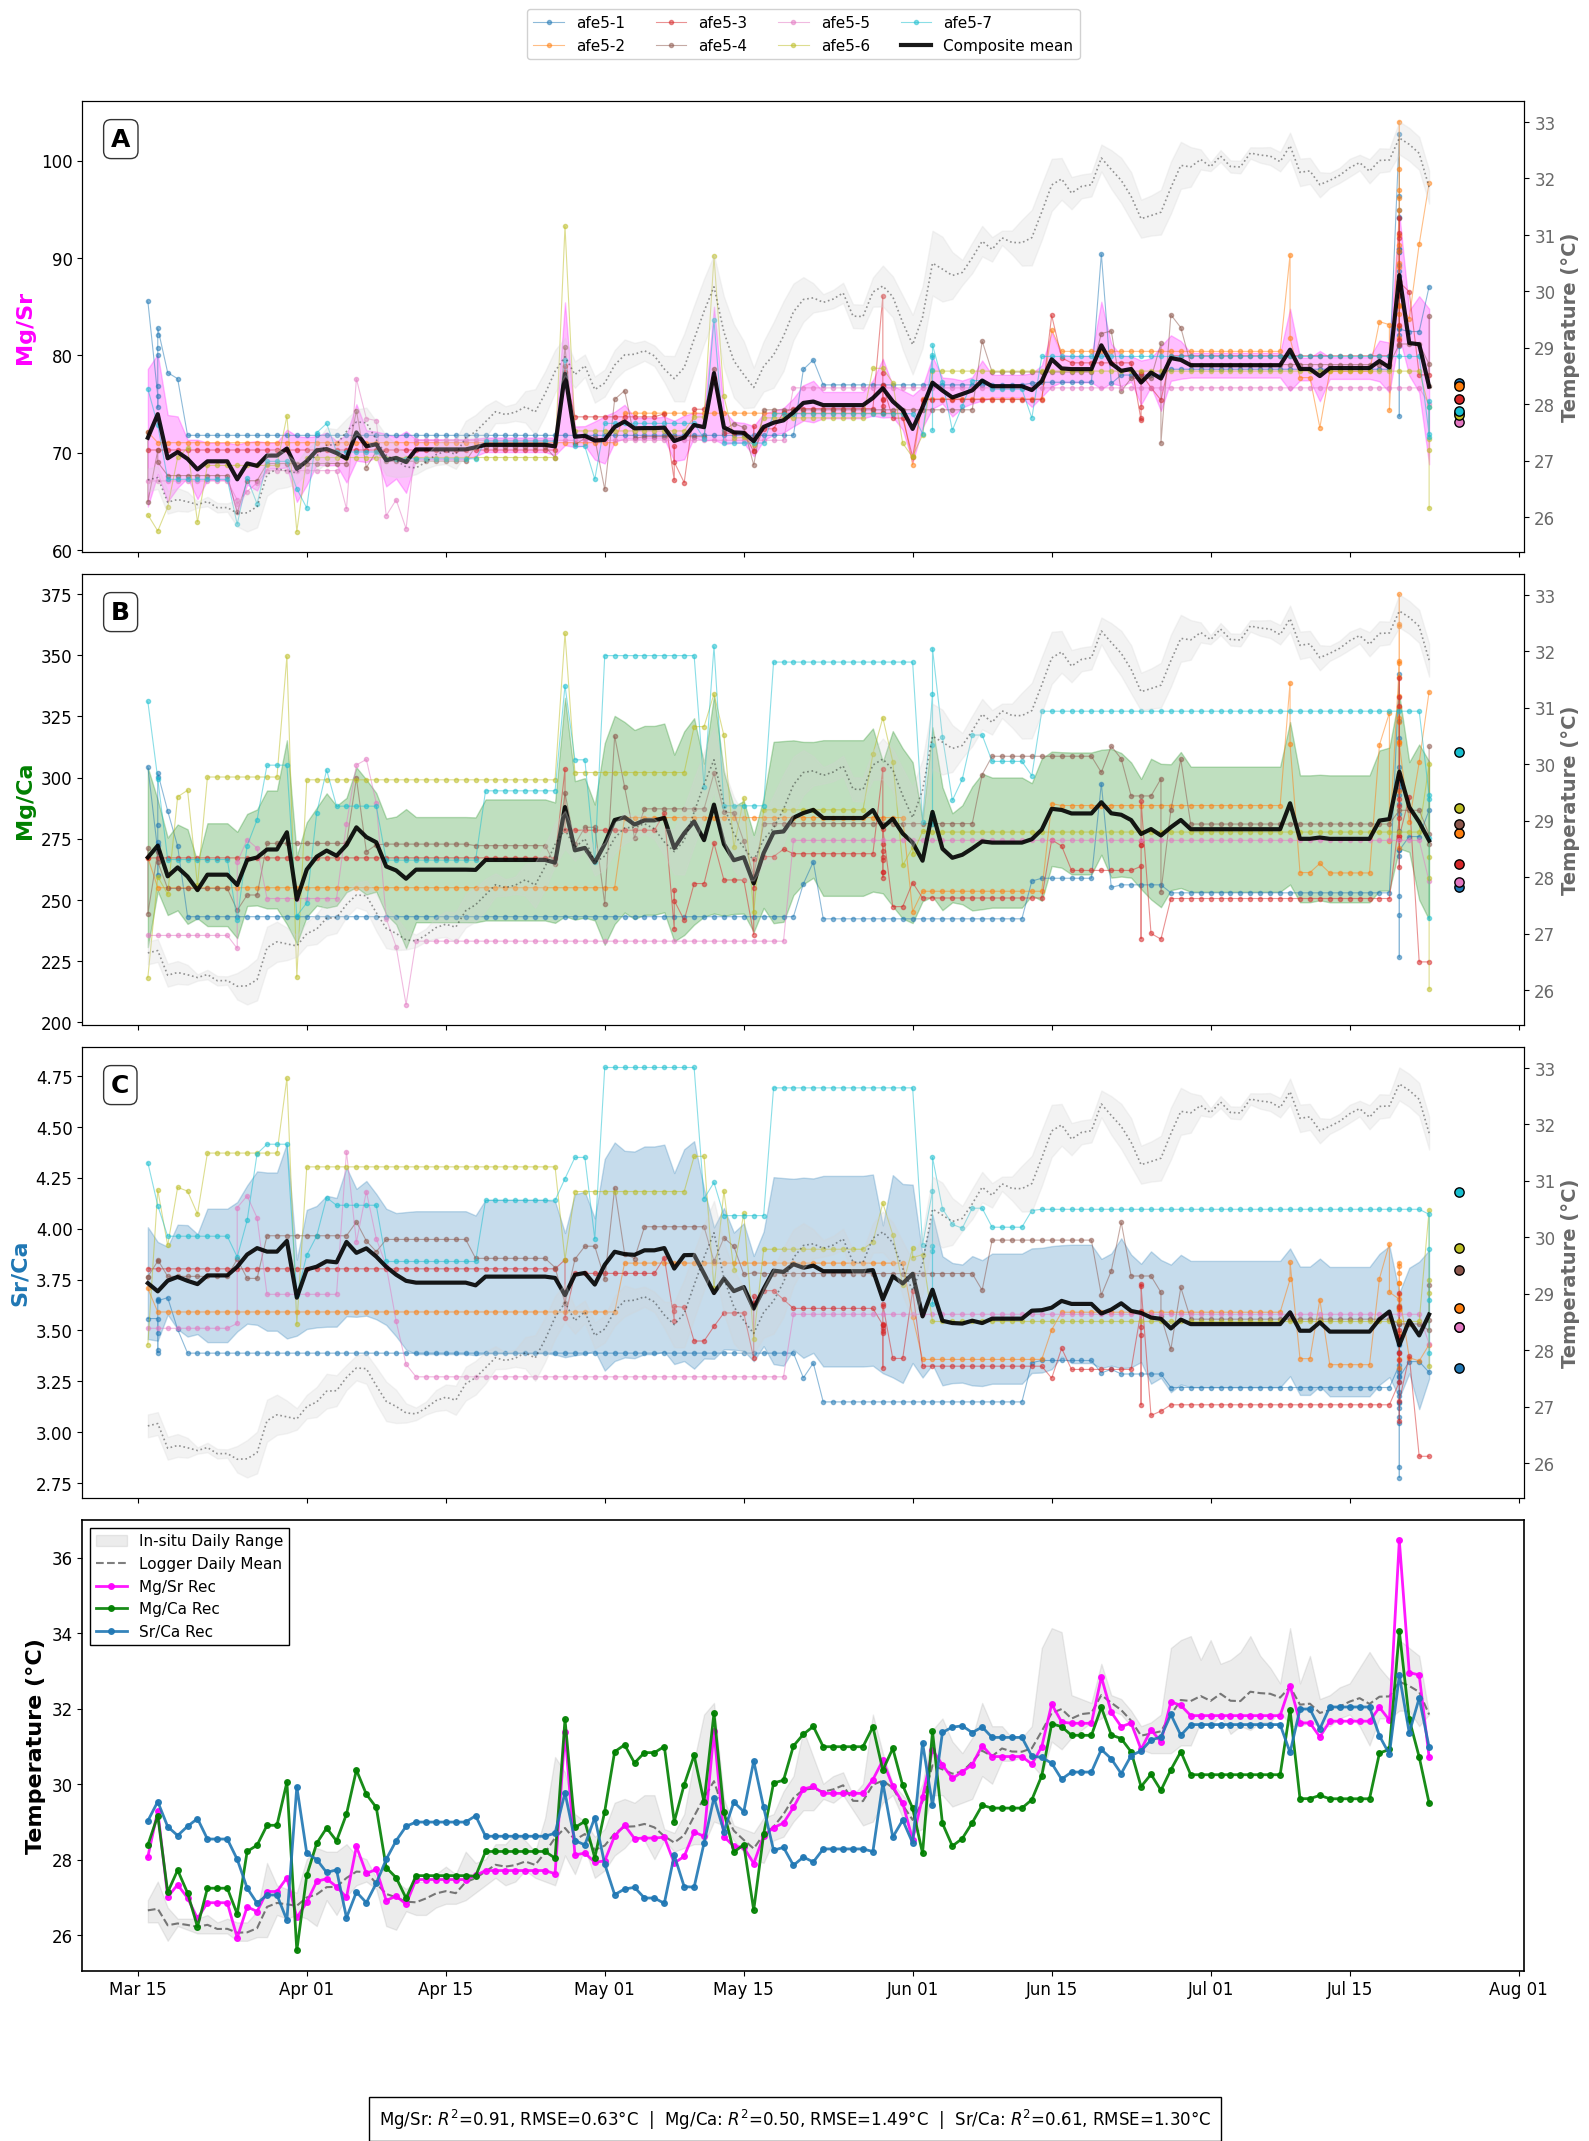

In [2]:
pipeline.plot_results()


 ## Per-branch validation subplots


STEP 8: INDIVIDUAL BRANCH VALIDATION (Mg/Sr)


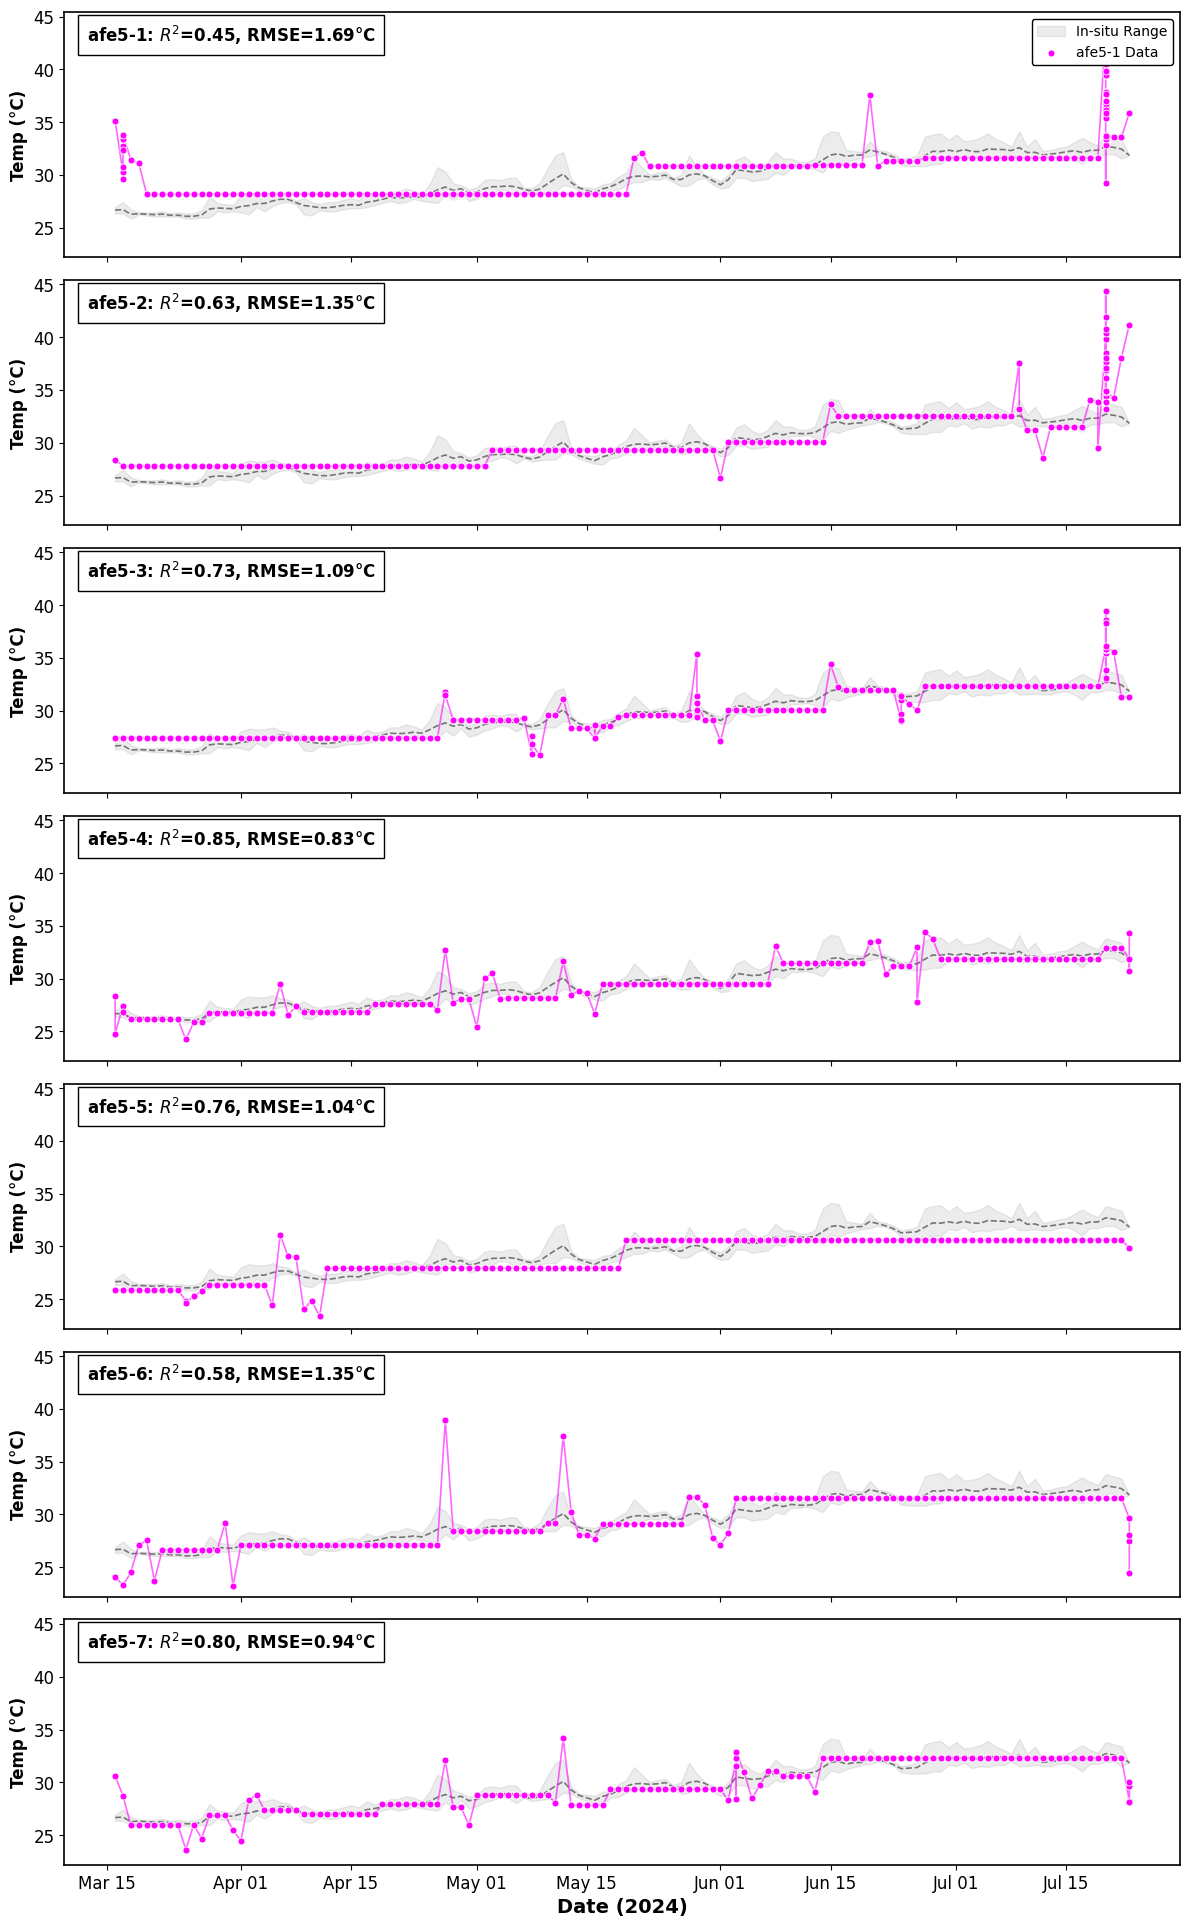

In [3]:
pipeline.plot_individual_branch_reconstructions()


 ## Element correlation heatmap


STEP 9: MULTI-ELEMENT CORRELATION HEATMAP (Formatted Labels)


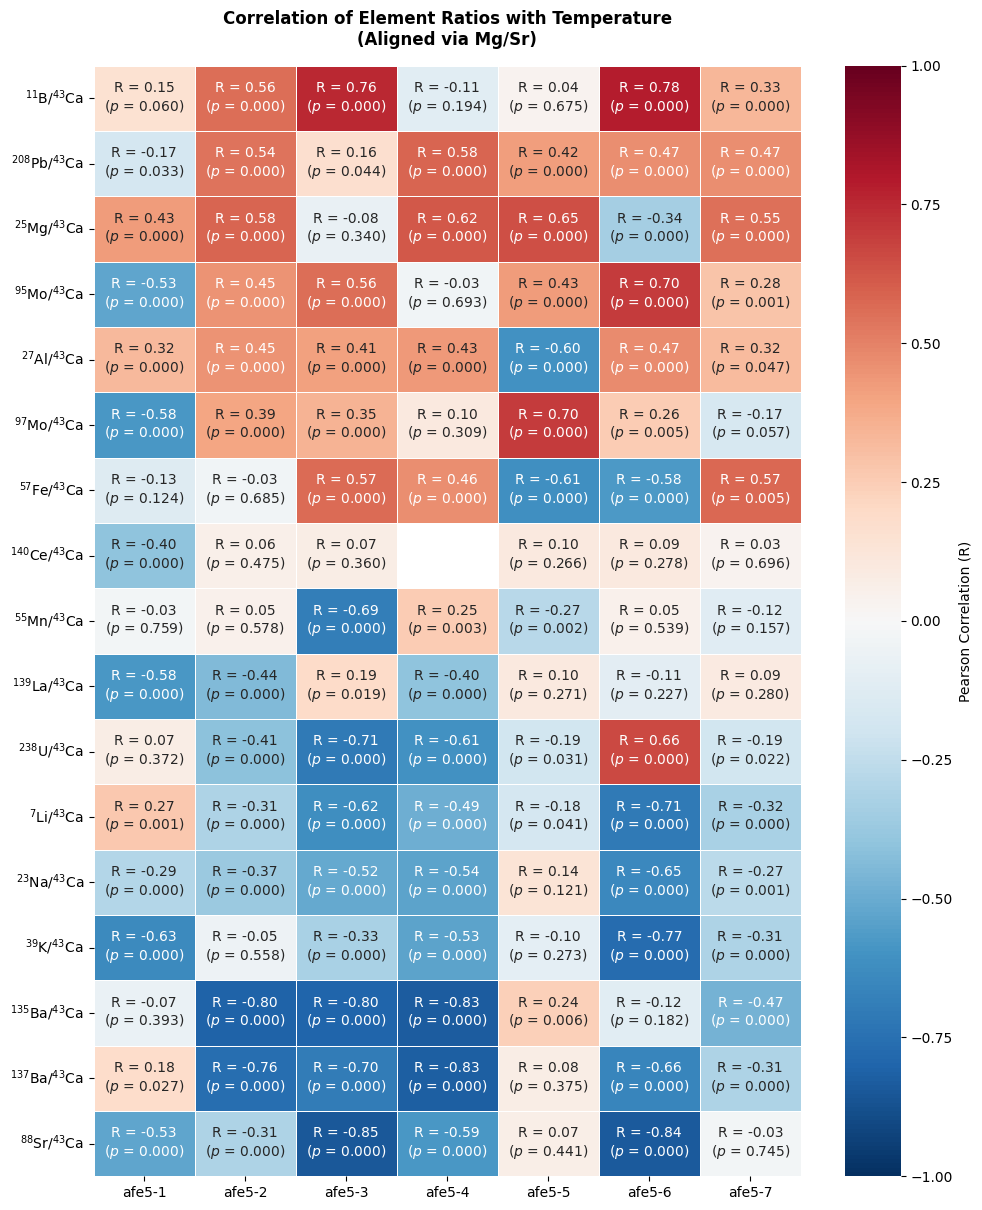

In [4]:
pipeline.plot_element_correlations_heatmap()


 ## Save figures to Drive (optional)



 Uncomment the block below and edit `FIGURE_DIR` to export all figures as

 PDF files with editable fonts (compatible with Adobe Illustrator).

In [5]:
# import matplotlib
# import matplotlib.pyplot as plt
# matplotlib.rcParams['pdf.fonttype'] = 42   # editable fonts in Illustrator
#
# FIGURE_DIR = CONFIG['paths']['output_dir'] + 'figures/'
#
# pipeline.plot_results()
# plt.savefig(FIGURE_DIR + 'figure_composite.pdf', bbox_inches='tight', dpi=300)
# plt.close()
#
# pipeline.plot_individual_branch_reconstructions()
# plt.savefig(FIGURE_DIR + 'figure_branches.pdf', bbox_inches='tight', dpi=300)
# plt.close()
#
# pipeline.plot_element_correlations_heatmap()
# plt.savefig(FIGURE_DIR + 'figure_heatmap.pdf', bbox_inches='tight', dpi=300)
# plt.close()
#
# print(f'Figures saved to {FIGURE_DIR}')
